# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')
data.to_csv('us_job_market_discrimination.csv')

In [20]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [21]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [26]:
#Create dataframe with only the columns that we need to answer the relevant question.
df = data[['race','call']]
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [57]:
#Create a dataframe with only the columns that we need to answer the relevant question
df = data[['race','call']]
#Create another dataframe with only the results for white-sounding names
df_w = df[df.race == 'w']
#And another for black-sounding names
df_b = df[df.race == 'b']
#N-sizes for black and white
n_half = 2435
n_total = (2435*2)
df.groupby([df.race]).size()

race
b    2435
w    2435
dtype: int64

# 1. What test is appropriate for this problem? Does CLT apply?
Although the variable "call" is categorical, it can be calculated as a proportion, so in this case we should use a two-proportion z-test.  CLT applies because we can assume sufficient number of samples/resamples of the sampled populations would yield a normally distributed set of proportions for the "call" variable, demonstrated below.

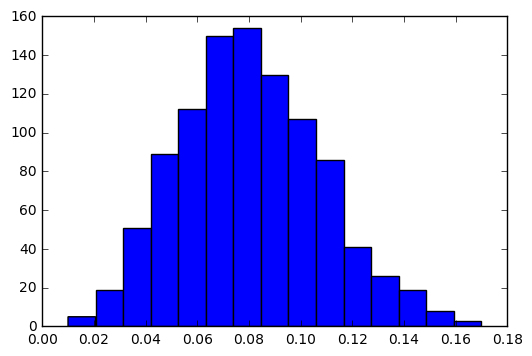

In [134]:
def make_sample(n=100):
    sample = df['call'].sample(n = 100)
    return sample
sample = make_sample(n=100)
def compute_sample_statistics(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return np.array(stats)
sample_means = compute_sample_statistics(n=100, iters=1000)
plt.hist(sample_means, bins=15)
plt.show()

# 2. What are the null and alternate hypotheses?
The alternate hypthesis is that there is no statistically significant difference between black-sounding and white-sounding names in the rate at which resumes sent with those names are called back for an interview.  

The alternate hypthesis is that there is a statistically significant difference between black-sounding and white-sounding names in the rate at which resumes sent with those names are called back for an interview.  

In [135]:
#In mathematical terms
print(df.groupby([df.call]).size())
print(df.groupby([df_w.call]).size())
print(df.groupby([df_b.call]).size())
total_proportion = round(392/4478,3)
white_proportion = round(235/2200,3)
black_proportion = round(157/2278,3)
print('Proportion of callbacks for white-sounding names:',white_proportion)
print('Proportion of callbacks for black-sounding names:',black_proportion)
print('Null hypothesis: The above proportions are not significantly different')
print('Alternate hypothesis:  The above proportions are significantly different')

call
0.0    4478
1.0     392
dtype: int64
call
0.0    2200
1.0     235
dtype: int64
call
0.0    2278
1.0     157
dtype: int64
Proportion of callbacks for white-sounding names: 0.107
Proportion of callbacks for black-sounding names: 0.069
Null hypothesis: The above proportions are not significantly different
Alternate hypothesis:  The above proportions are significantly different


# 3. Compute margin of error, confidence interval, and p-value.

In [138]:
#For a 95% CI, we should use a z-score of 1.96
z_critical = 1.96
margin_error = round(z_critical*(np.sqrt((total_proportion*(1-total_proportion))/n_total)),3)
print("Margin of error =",margin_error)
print('95% Confidence interval =',total_proportion,'+-',margin_error)
print('95% Confidence interval =',(total_proportion-margin_error),'to',(total_proportion+margin_error))
z = (white_proportion-black_proportion)/np.sqrt((total_proportion*(1-total_proportion))*(1/n_half+1/n_half))
print('z =',round(z,2))
print('p <',0.001)

Margin of error = 0.008
95% Confidence interval = 0.088 +- 0.008
95% Confidence interval = 0.08 to 0.096
z = 4.68
p < 0.001


# 4. Write a story describing the statistical significance in the context or the original problem.
I found that there was a highly statistically significant (p < 0.001) difference in the proportion of callbacks between black and white sounding names.  This means that, assuming that all other variables were controlled in the original experiment, there is almost certainly an effect of the implied race in a name on the likelihood of an applicant to be called back for an interview.  

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
My analysis suggests that at the least, race/name is a significant factor in determining callback success.  However, the analysis is not comprehensive enough to determine whether or not race/name is the *most* important factor in callback success.  There are a multitude of variables at play in any decision regarding job applications.  For instance, one could hypothesize that in a more high-tech field where significant job experience or education is required, there might be less discrepancy as a result of the race-implications of one's name, or at least we would find that qualification would be a more important factor than race.  

If I ran this analysis for publication, I would be sure to incorporate as many variables as possible in order to determine the relative weight of a variety of factors including level of qualification, location, the type of job, gender, etc - many of which were included in the original dataset.  I would make additional comparisons between black and white-sounding applicants matched for these factors - for instance, it would be interesting to see if black and white-sounding applicants had significantly different results across all levels of qualification, or across multiple different fields of employment.  Furthermore, we could test to see if white applicants with lower qualification still did better than black applicants with better qualifications - ideally, it might even be possible to quantify the relative amount of extra qualification that a candidate with a black-sounding name would need to overcome racial bias.  